## Data cleaning and EDA for the Airbnb data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data from google drive

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_newyork = pd.read_csv("/content/drive/MyDrive/Capstone/listing_NEWYORK.csv", low_memory=False)
df_newjersey = pd.read_csv("/content/drive/MyDrive/Capstone/listing_NEWJERSEY.csv", low_memory=False)
df_washington_DC = pd.read_csv("/content/drive/MyDrive/Capstone/listing_WASHINGTONDC.csv", low_memory=False)

### Creating a new column with name location to identify the location of the airbnb

In [4]:
df_newyork['location'] = 'New york' # assigning New york column to New york dataset

In [5]:
df_newjersey['location'] = 'New Jersey'

In [6]:
df_washington_DC['location'] = 'Washington D.C'

In [7]:
df_newyork.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,location
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,3,2022-08-10,0.03,1,267,1,NaN,New york
1,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.73,1,0,0,NaN,New york
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,322,0,NaN,New york
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,559,2022-11-20,3.38,1,79,50,NaN,New york
4,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,175,30,49,2022-06-21,0.31,3,365,1,NaN,New york


In [8]:
df_newjersey.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,location
0,62033,LARGE BEDROOM IN HISTORIC DISTRICT,301435,Fred,NaN,North,40.77146,-74.17054,Private room,80,2,74,2022-10-23,0.52,1,365,2,NaN,New Jersey
1,1975091,"Hello World, Welcome to Newark!!!!",9169027,Kimberly B,NaN,West,40.74462,-74.19848,Private room,115,10,86,2022-12-16,0.82,5,272,7,NaN,New Jersey
2,2159185,Hello World! Zen room. New photos coming soon.,9169027,Kimberly B,NaN,West,40.74478,-74.19575,Private room,52,10,96,2022-11-02,0.90,5,362,5,NaN,New Jersey
3,2277901,Luxury Muwuyu Queen enSuite @MushaindoroHS,11308972,Tendai,NaN,West,40.73473,-74.24575,Private room,65,4,50,2022-06-17,0.48,3,334,3,NaN,New Jersey
4,2278440,Luxury Musasa Queen Suite @ MushaindoroHS,11308972,Tendai,NaN,West,40.73471,-74.24787,Private room,55,3,44,2022-11-23,0.41,3,328,7,NaN,New Jersey


In [9]:
df_washington_DC.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,location
0,196429,"Takoma Garden apt-Lush yard,pets ok",956417,Julia,NaN,"Takoma, Brightwood, Manor Park",38.96995,-77.01984,Entire home/apt,125,31,7,2022-04-01,0.06,1,358,1,NaN,Washington D.C
1,3686,Vita's Hideaway,4645,Vita,NaN,Historic Anacostia,38.86177,-76.98966,Private room,67,31,81,2022-07-06,0.55,1,365,4,NaN,Washington D.C
2,3943,Historic Rowhouse Near Monuments,5059,Vasa,NaN,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91066,-77.00438,Private room,75,1,449,2022-12-04,2.71,4,355,13,Hosted License: 5007242201001033,Washington D.C
3,4967,"DC, Near Metro",7086,Edward,NaN,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91409,-76.99368,Private room,500,1125,31,2016-09-22,0.21,3,349,0,NaN,Washington D.C
4,888029,PERFECT ROOM FOR INTERNS OR STUDENTS,315148,John,NaN,"Brightwood Park, Crestwood, Petworth",38.93656,-77.02377,Private room,35,31,15,2022-12-06,0.13,35,244,3,NaN,Washington D.C


### Printing shape of datasets


In [10]:
print("Number of Airbnb listings in NEW YORK is ", df_newyork.shape[0])
print("Number of Airbnb listings in NEW JESRSEY is ", df_newjersey.shape[0])
print("Number of Airbnb listings in WASHINGTON D.C is ", df_washington_DC.shape[0])

Number of Airbnb listings in NEW YORK is  41533
Number of Airbnb listings in NEW JESRSEY is  1260
Number of Airbnb listings in WASHINGTON D.C is  6217


In [11]:
df_newyork.neighbourhood_group.isna().sum()

0

In [12]:
df_newjersey.neighbourhood_group.isna().sum()

1260

In [13]:
df_washington_DC.neighbourhood_group.isna().sum()

6217

### Info and data types for the dataset

In [14]:
df_newyork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41533 entries, 0 to 41532
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              41533 non-null  int64  
 1   name                            41520 non-null  object 
 2   host_id                         41533 non-null  int64  
 3   host_name                       41528 non-null  object 
 4   neighbourhood_group             41533 non-null  object 
 5   neighbourhood                   41533 non-null  object 
 6   latitude                        41533 non-null  float64
 7   longitude                       41533 non-null  float64
 8   room_type                       41533 non-null  object 
 9   price                           41533 non-null  int64  
 10  minimum_nights                  41533 non-null  int64  
 11  number_of_reviews               41533 non-null  int64  
 12  last_review                     

In [15]:
df_newjersey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1260 non-null   int64  
 1   name                            1260 non-null   object 
 2   host_id                         1260 non-null   int64  
 3   host_name                       1260 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   1260 non-null   object 
 6   latitude                        1260 non-null   float64
 7   longitude                       1260 non-null   float64
 8   room_type                       1260 non-null   object 
 9   price                           1260 non-null   int64  
 10  minimum_nights                  1260 non-null   int64  
 11  number_of_reviews               1260 non-null   int64  
 12  last_review                     10

In [16]:
df_washington_DC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6217 entries, 0 to 6216
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6217 non-null   int64  
 1   name                            6217 non-null   object 
 2   host_id                         6217 non-null   int64  
 3   host_name                       6217 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6217 non-null   object 
 6   latitude                        6217 non-null   float64
 7   longitude                       6217 non-null   float64
 8   room_type                       6217 non-null   object 
 9   price                           6217 non-null   int64  
 10  minimum_nights                  6217 non-null   int64  
 11  number_of_reviews               6217 non-null   int64  
 12  last_review                     49

### Summary of dataset

In [17]:
df_newyork.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,4.153300e+04,4.153300e+04,41533.000000,41533.000000,41533.000000,41533.000000,41533.000000,32140.000000,41533.000000,41533.000000,41533.000000
mean,1.728318e+17,1.400636e+08,40.728292,-73.944526,221.978282,18.592204,26.204994,1.279287,20.626803,143.287771,7.983700
std,2.974371e+17,1.526932e+08,0.057145,0.055965,919.502236,30.699921,56.178847,1.935098,68.874393,144.279510,18.563894
min,2.595000e+03,2.438000e+03,40.500314,-74.249840,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.835861e+07,1.491162e+07,40.687750,-73.982410,80.000000,2.000000,1.000000,0.140000,1.000000,0.000000,0.000000
50%,4.117861e+07,6.561181e+07,40.723830,-73.953156,131.000000,10.000000,5.000000,0.580000,1.000000,87.000000,1.000000
75%,5.477978e+17,2.418897e+08,40.762200,-73.924990,220.000000,30.000000,25.000000,1.880000,4.000000,312.000000,8.000000
max,7.741268e+17,4.899967e+08,40.911380,-73.710870,98159.000000,1250.000000,1666.000000,102.980000,487.000000,365.000000,992.000000


In [18]:
df_newjersey.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,1.260000e+03,1.260000e+03,0.0,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1049.000000,1260.000000,1260.000000,1260.000000,0.0
mean,3.227006e+17,2.482281e+08,NaN,40.734886,-74.190626,126.019841,3.446032,28.088889,1.881697,11.066667,260.133333,11.598413,NaN
std,3.533176e+17,1.553622e+08,NaN,0.018309,0.021173,289.630041,6.638117,51.730606,1.748285,14.652458,128.887386,17.599029,NaN
min,6.203300e+04,1.727000e+04,NaN,40.686980,-74.248710,25.000000,1.000000,0.000000,0.020000,1.000000,0.000000,0.000000,NaN
25%,4.418791e+07,8.832780e+07,NaN,40.722282,-74.208505,51.000000,1.000000,2.000000,0.540000,2.000000,163.500000,1.000000,NaN
50%,5.334671e+07,2.478243e+08,NaN,40.735365,-74.188905,72.000000,1.000000,8.000000,1.290000,5.000000,339.000000,4.000000,NaN
75%,7.121360e+17,3.928982e+08,NaN,40.746493,-74.173433,142.000000,3.000000,33.000000,2.740000,12.000000,362.000000,15.000000,NaN
max,7.927869e+17,4.933660e+08,NaN,40.783610,-74.134010,8000.000000,83.000000,504.000000,10.980000,55.000000,365.000000,150.000000,NaN


In [19]:
df_washington_DC.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.217000e+03,6.217000e+03,0.0,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,4925.000000,6217.000000,6217.000000,6217.000000
mean,1.507328e+17,1.154536e+08,NaN,38.910146,-77.015140,178.202509,21.811163,51.725591,1.855131,28.792826,188.570372,14.320733
std,2.841390e+17,1.327067e+08,NaN,0.024366,0.030696,705.550802,40.717326,87.497018,2.355270,58.787649,138.698806,23.608094
min,3.686000e+03,4.492000e+03,NaN,38.820780,-77.109000,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.084250e+07,1.601717e+07,NaN,38.897556,-77.034850,83.000000,2.000000,1.000000,0.320000,1.000000,59.000000,0.000000
50%,4.187946e+07,5.038247e+07,NaN,38.909550,-77.017540,119.000000,15.000000,14.000000,1.190000,2.000000,179.000000,3.000000
75%,5.353049e+07,1.747920e+08,NaN,38.922870,-76.995360,180.000000,31.000000,62.000000,2.730000,13.000000,340.000000,21.000000
max,7.855798e+17,4.915968e+08,NaN,38.992140,-76.909270,51534.000000,1125.000000,892.000000,88.950000,214.000000,365.000000,507.000000


# Grouping all three dataset of different locations

In [20]:
grouping_df = [df_newyork, df_newjersey, df_washington_DC]

In [21]:
final_df = pd.concat(grouping_df)

In [22]:
final_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,location
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,3,2022-08-10,0.03,1,267,1,NaN,New york
1,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.73,1,0,0,NaN,New york
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,322,0,NaN,New york
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,559,2022-11-20,3.38,1,79,50,NaN,New york
4,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,175,30,49,2022-06-21,0.31,3,365,1,NaN,New york
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6212,13853404,A Petite Elegance,81822679,Young,NaN,"Dupont Circle, Connecticut Avenue/K Street",38.91352,-77.03764,Entire home/apt,125,31,0,NaN,NaN,1,0,0,NaN,Washington D.C
6213,13894976,"Perfect location, wonderful home for a DC stay.",81929011,Bob,NaN,"Capitol Hill, Lincoln Park",38.88628,-76.99586,Entire home/apt,375,31,31,2022-09-11,0.42,1,351,13,NaN,Washington D.C
6214,13913413,Bright cozy room in Columbia Heights rowhouse,18594116,Quinn,NaN,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",38.93018,-77.02491,Private room,30,31,1,2016-07-30,0.01,1,0,0,NaN,Washington D.C
6215,13913758,"Brand New Luxury Studio in Shaw, Pro cleaned",70098073,Madison,NaN,"Shaw, Logan Circle",38.91070,-77.01696,Entire home/apt,94,1,81,2022-12-04,5.81,3,342,72,Hosted License: 5007242201001794,Washington D.C


In [23]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49010 entries, 0 to 6216
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              49010 non-null  int64  
 1   name                            48997 non-null  object 
 2   host_id                         49010 non-null  int64  
 3   host_name                       49005 non-null  object 
 4   neighbourhood_group             41533 non-null  object 
 5   neighbourhood                   49010 non-null  object 
 6   latitude                        49010 non-null  float64
 7   longitude                       49010 non-null  float64
 8   room_type                       49010 non-null  object 
 9   price                           49010 non-null  int64  
 10  minimum_nights                  49010 non-null  int64  
 11  number_of_reviews               49010 non-null  int64  
 12  last_review                     3

In [24]:
final_df.isnull().any() # Considering the columns with non null values

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group                True
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
number_of_reviews_ltm             False
license                            True
location                          False
dtype: bool

In [25]:
licence_count = final_df.license.isna().sum()
name_count = final_df.name.isna().sum()
reviews_per_month_count = final_df.reviews_per_month.isna().sum()
last_review_count = final_df.last_review.isna().sum()
host_name_count = final_df.host_name.isna().sum()
neighbourhood_group_count = final_df.neighbourhood_group.isna().sum()


print("Total null values in Licence column", licence_count)
# Almost all of the rows doesn't have licence column

print("Total null values in Airbnb name column",name_count) 
# 13 houses does not have any name

print("Total null values in reviews per month column",reviews_per_month_count)
# There are 10896 houses with no reviews

print("Total null values in last review column",last_review_count) 
# There are 10896 houses with no reviews

print("Total null values in host name column",host_name_count) 
# There are 5 houses whose host information is not available

print("Total null values in neighbourhood group column",neighbourhood_group_count) 
# New Jersey and washington DC does not have any neighbourhood groups

Total null values in Licence column 45636
Total null values in Airbnb name column 13
Total null values in reviews per month column 10896
Total null values in last review column 10896
Total null values in host name column 5
Total null values in neighbourhood group column 7477


* Licence, Reviews per month , last review, neighbourhood_group, host_name and 
name columns has null values
* The dataset has no information of these details. 
* So, Dropping Licence columns and few other columns to work for analysis and ML

In [26]:
final_df['last_review'] = pd.to_datetime(final_df['last_review'],infer_datetime_format=True) 

In [27]:
total = final_df.isnull().sum().sort_values(ascending=False)
percent = (final_df.isnull().sum())/final_df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(40)

,Total,Percent
license,45636,0.931157
last_review,10896,0.222322
reviews_per_month,10896,0.222322
neighbourhood_group,7477,0.152561
name,13,0.000265
host_name,5,0.000102
minimum_nights,0,0.000000
host_id,0,0.000000
neighbourhood,0,0.000000
latitude,0,0.000000


In [28]:
final_df['neighbourhood_group'] = final_df['neighbourhood_group'].fillna("No Neighbourhood group")

In [29]:
final_df.reset_index(inplace = True)

In [30]:
final_df = final_df.drop(columns=['license', 'index','host_name','name'] )

### Lets find number of unique rows in each column

In [31]:
unique_nums = final_df.nunique()
unique_nums

id                                49010
host_id                           30562
neighbourhood_group                   6
neighbourhood                       267
latitude                          24867
longitude                         23534
room_type                             4
price                              1324
minimum_nights                      129
number_of_reviews                   522
last_review                        2780
reviews_per_month                   978
calculated_host_listings_count       74
availability_365                    366
number_of_reviews_ltm               179
location                              3
dtype: int64

#### As we can see there are 5 unique neighbourhood groups and 4 unique room types. Lets check the unique categories of neighbourhood groups and room types

In [32]:
final_df.neighbourhood_group.unique()
# There are 5 neighbourhood groups in New york but no neighbourhood groups in Washington DC and New Jersey

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island',
       'No Neighbourhood group'], dtype=object)

In [33]:
final_df.room_type.unique() 
# There are 4 types of rooms available in Airbnb

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [34]:
final_df['reviews_per_month'] = final_df['reviews_per_month'].fillna(0)

In [35]:
earliest = min(final_df['last_review'])
final_df['last_review'] = final_df['last_review'].fillna(earliest)
final_df['last_review'] = final_df['last_review'].apply(lambda x: x.toordinal() - earliest.toordinal())

In [36]:
final_df['last_review'].isna().sum()

0

In [37]:
total = final_df.isnull().sum().sort_values(ascending=False)
percent = (final_df.isnull().sum())/final_df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(40)

,Total,Percent
id,0,0.0
host_id,0,0.0
neighbourhood_group,0,0.0
neighbourhood,0,0.0
latitude,0,0.0
longitude,0,0.0
room_type,0,0.0
price,0,0.0
minimum_nights,0,0.0
number_of_reviews,0,0.0


In [38]:
final_df

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,location
0,5136,7378,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,3,4108,0.03,1,267,1,New york
1,5203,7490,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2262,0.73,1,0,0,New york
2,5121,7356,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,3126,0.30,2,322,0,New york
3,5178,8967,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,559,4210,3.38,1,79,50,New york
4,2595,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,175,30,49,4058,0.31,3,365,1,New york
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49005,13853404,81822679,No Neighbourhood group,"Dupont Circle, Connecticut Avenue/K Street",38.91352,-77.03764,Entire home/apt,125,31,0,0,0.00,1,0,0,Washington D.C
49006,13894976,81929011,No Neighbourhood group,"Capitol Hill, Lincoln Park",38.88628,-76.99586,Entire home/apt,375,31,31,4140,0.42,1,351,13,Washington D.C
49007,13913413,18594116,No Neighbourhood group,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",38.93018,-77.02491,Private room,30,31,1,1906,0.01,1,0,0,Washington D.C
49008,13913758,70098073,No Neighbourhood group,"Shaw, Logan Circle",38.91070,-77.01696,Entire home/apt,94,1,81,4224,5.81,3,342,72,Washington D.C


In [39]:
final_df

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,location
0,5136,7378,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,3,4108,0.03,1,267,1,New york
1,5203,7490,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2262,0.73,1,0,0,New york
2,5121,7356,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,3126,0.30,2,322,0,New york
3,5178,8967,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,559,4210,3.38,1,79,50,New york
4,2595,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,175,30,49,4058,0.31,3,365,1,New york
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49005,13853404,81822679,No Neighbourhood group,"Dupont Circle, Connecticut Avenue/K Street",38.91352,-77.03764,Entire home/apt,125,31,0,0,0.00,1,0,0,Washington D.C
49006,13894976,81929011,No Neighbourhood group,"Capitol Hill, Lincoln Park",38.88628,-76.99586,Entire home/apt,375,31,31,4140,0.42,1,351,13,Washington D.C
49007,13913413,18594116,No Neighbourhood group,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",38.93018,-77.02491,Private room,30,31,1,1906,0.01,1,0,0,Washington D.C
49008,13913758,70098073,No Neighbourhood group,"Shaw, Logan Circle",38.91070,-77.01696,Entire home/apt,94,1,81,4224,5.81,3,342,72,Washington D.C


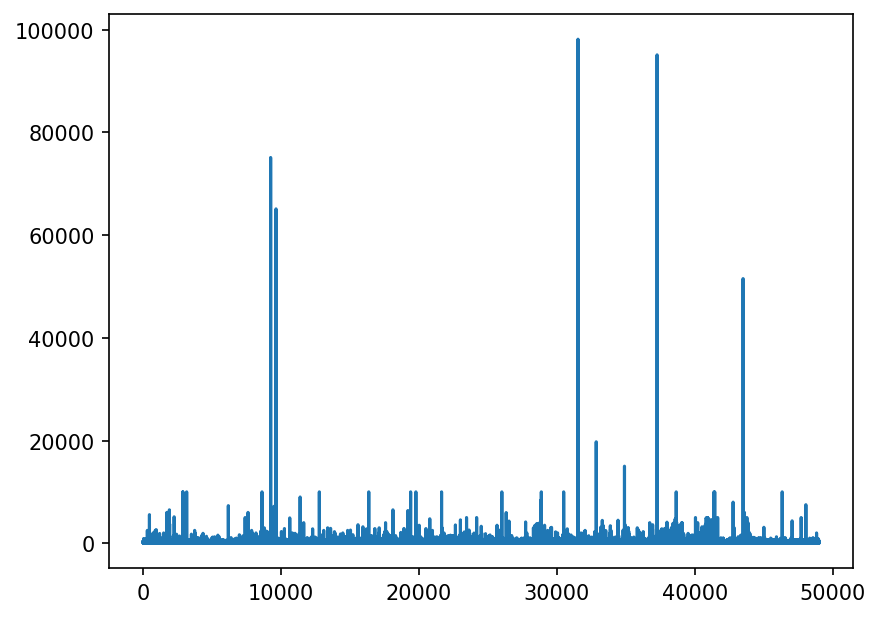

In [40]:
fig = plt.figure(dpi= 150)
plt.plot(final_df['price'])
plt.show()

In [41]:
final_df[final_df['price'] > 10000]

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,location
9256,15604499,62605071,Brooklyn,Coney Island,40.577170,-73.999860,Private room,75120,30,112,3202,1.54,6,33,0,New york
9645,16289102,92493393,Staten Island,West Brighton,40.633040,-74.112750,Private room,65115,2,55,4096,0.75,3,1,5,New york
31527,563183407738604083,422985413,Brooklyn,Bedford-Stuyvesant,40.681930,-73.916350,Entire home/apt,98159,2,3,4105,0.61,1,62,3,New york
32847,603665411466936794,34906299,Manhattan,Upper East Side,40.765260,-73.971710,Entire home/apt,19750,7,0,0,0.00,1,285,0,New york
34895,658503812592195974,363776653,Manhattan,East Harlem,40.786225,-73.942838,Entire home/apt,15000,21,0,0,0.00,1,0,0,New york
37257,706066765395654135,445395972,Bronx,Wakefield,40.886710,-73.864310,Entire home/apt,95110,2,0,0,0.00,5,36,0,New york
43488,12202079,15365907,No Neighbourhood group,"Shaw, Logan Circle",38.911490,-77.021170,Private room,51534,3,234,4227,2.87,3,76,11,Washington D.C


### There are 7 housings in the dataset whose price is above 10000 dollars. These rows are not getting dropped because there might be a chance that hosts may list luxury houses and hence this will be useful for analysis

In [42]:
final_df = final_df.drop(final_df[final_df['price'] > 10000].index, inplace=False)

In [43]:
final_df

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,location
0,5136,7378,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,3,4108,0.03,1,267,1,New york
1,5203,7490,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2262,0.73,1,0,0,New york
2,5121,7356,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,3126,0.30,2,322,0,New york
3,5178,8967,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,559,4210,3.38,1,79,50,New york
4,2595,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,175,30,49,4058,0.31,3,365,1,New york
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49005,13853404,81822679,No Neighbourhood group,"Dupont Circle, Connecticut Avenue/K Street",38.91352,-77.03764,Entire home/apt,125,31,0,0,0.00,1,0,0,Washington D.C
49006,13894976,81929011,No Neighbourhood group,"Capitol Hill, Lincoln Park",38.88628,-76.99586,Entire home/apt,375,31,31,4140,0.42,1,351,13,Washington D.C
49007,13913413,18594116,No Neighbourhood group,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",38.93018,-77.02491,Private room,30,31,1,1906,0.01,1,0,0,Washington D.C
49008,13913758,70098073,No Neighbourhood group,"Shaw, Logan Circle",38.91070,-77.01696,Entire home/apt,94,1,81,4224,5.81,3,342,72,Washington D.C


In [44]:
final_df[final_df['price'] == 0]

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,location
20487,40560656,273324213,Brooklyn,Williamsburg,40.720960,-73.958600,Hotel room,0,1,75,4207,1.93,1,0,15,New york
21001,41792753,197053492,Manhattan,Financial District,40.706510,-74.007770,Hotel room,0,1,0,0,0.00,1,0,0,New york
21010,41740615,268417148,Manhattan,Midtown,40.744590,-73.985740,Hotel room,0,1,48,4169,1.27,1,0,12,New york
21011,41740622,269311462,Manhattan,Upper East Side,40.764420,-73.963030,Hotel room,0,1,5,4160,0.17,1,0,2,New york
21148,42065543,307634016,Manhattan,Midtown,40.744440,-73.989200,Hotel room,0,1,329,4194,12.90,1,0,56,New york
21152,42065545,310429455,Manhattan,Midtown,40.759170,-73.969260,Hotel room,0,30,0,0,0.00,1,0,0,New york
21154,42065547,308721299,Manhattan,Hell's Kitchen,40.764040,-73.994780,Hotel room,0,30,0,0,0.00,1,0,0,New york
21155,42065555,309714886,Brooklyn,Williamsburg,40.715230,-73.959080,Hotel room,0,1,1,3233,0.03,1,0,0,New york
21162,42065562,307633956,Manhattan,Financial District,40.709580,-74.008740,Hotel room,0,1,0,0,0.00,1,0,0,New york
21167,42065563,309772430,Bronx,Mott Haven,40.815130,-73.916020,Hotel room,0,30,0,0,0.00,1,0,0,New york


There are 33 rows where the price of the Airbnb is 0. so dropping these rows

In [45]:
final_df = final_df.drop(final_df[final_df['price'] == 0].index, inplace=False)

In [46]:
final_df.to_excel("final_df.xlsx", index=False)


In [47]:
final_df


,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,location
0,5136,7378,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,3,4108,0.03,1,267,1,New york
1,5203,7490,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2262,0.73,1,0,0,New york
2,5121,7356,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,3126,0.30,2,322,0,New york
3,5178,8967,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,559,4210,3.38,1,79,50,New york
4,2595,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,175,30,49,4058,0.31,3,365,1,New york
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49005,13853404,81822679,No Neighbourhood group,"Dupont Circle, Connecticut Avenue/K Street",38.91352,-77.03764,Entire home/apt,125,31,0,0,0.00,1,0,0,Washington D.C
49006,13894976,81929011,No Neighbourhood group,"Capitol Hill, Lincoln Park",38.88628,-76.99586,Entire home/apt,375,31,31,4140,0.42,1,351,13,Washington D.C
49007,13913413,18594116,No Neighbourhood group,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",38.93018,-77.02491,Private room,30,31,1,1906,0.01,1,0,0,Washington D.C
49008,13913758,70098073,No Neighbourhood group,"Shaw, Logan Circle",38.91070,-77.01696,Entire home/apt,94,1,81,4224,5.81,3,342,72,Washington D.C


Using these rows for plots in Tableau

In [48]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots

init_notebook_mode(connected=True)

import collections
import itertools

import scipy.stats as stats
from scipy.stats import norm
from scipy.special import boxcox1p

import statsmodels
import statsmodels.api as sm
#print(statsmodels.__version__)

from sklearn.preprocessing import scale, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet,  HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.utils import resample

from xgboost import XGBRegressor

#Model interpretation modules


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<ipython-input-49-f8d60de9faf3>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-49-f8d60de9faf3>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




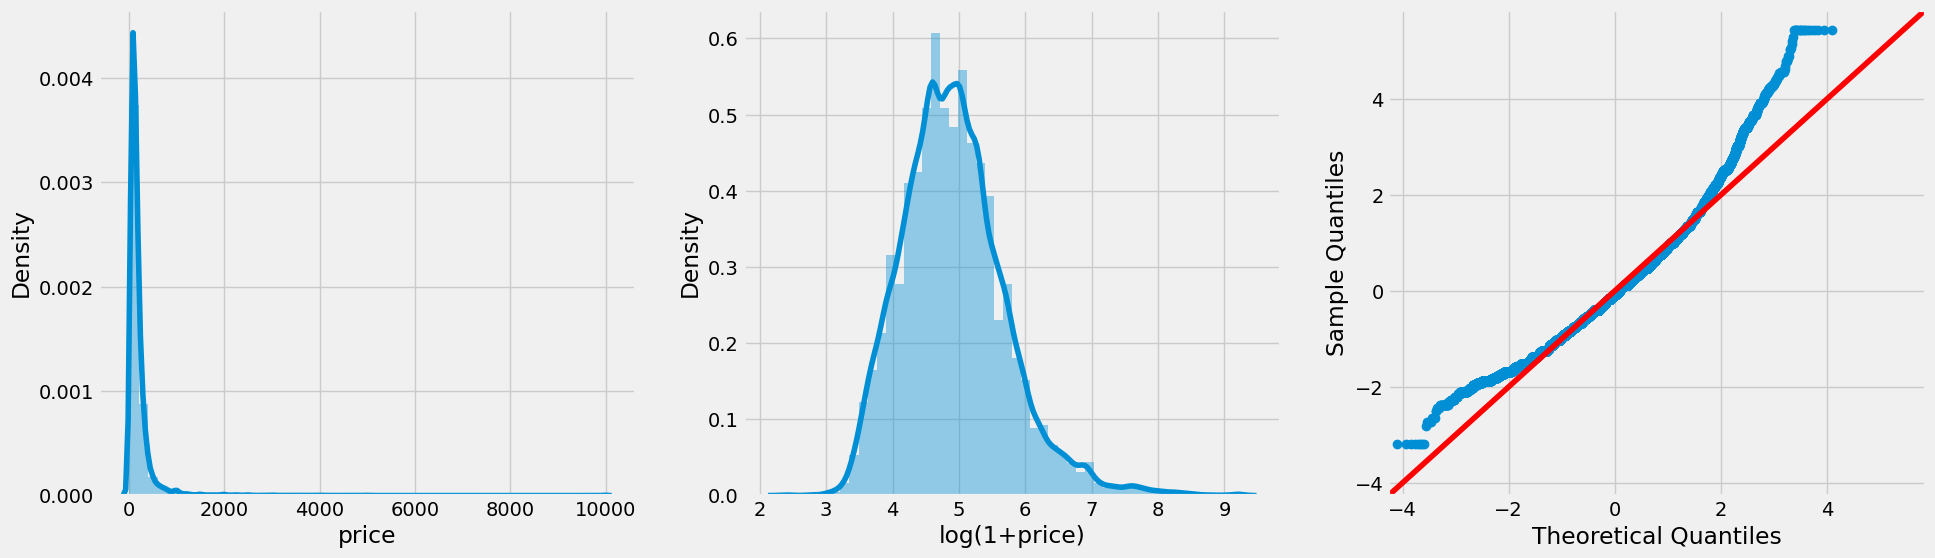

In [49]:
fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(final_df['price'], ax=axes[0])
sns.distplot(np.log1p(final_df['price']), ax=axes[1])
axes[1].set_xlabel('log(1+price)')
sm.qqplot(np.log1p(final_df['price']), stats.norm, fit=True, line='45', ax=axes[2]);


In [50]:
final_df['price'] = np.log1p(final_df['price'])

In [51]:
final_df = final_df.drop(['host_id', 'id'], axis=1)

<ipython-input-52-aadd3f9db8dd>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-52-aadd3f9db8dd>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0, 0.5, 'count')

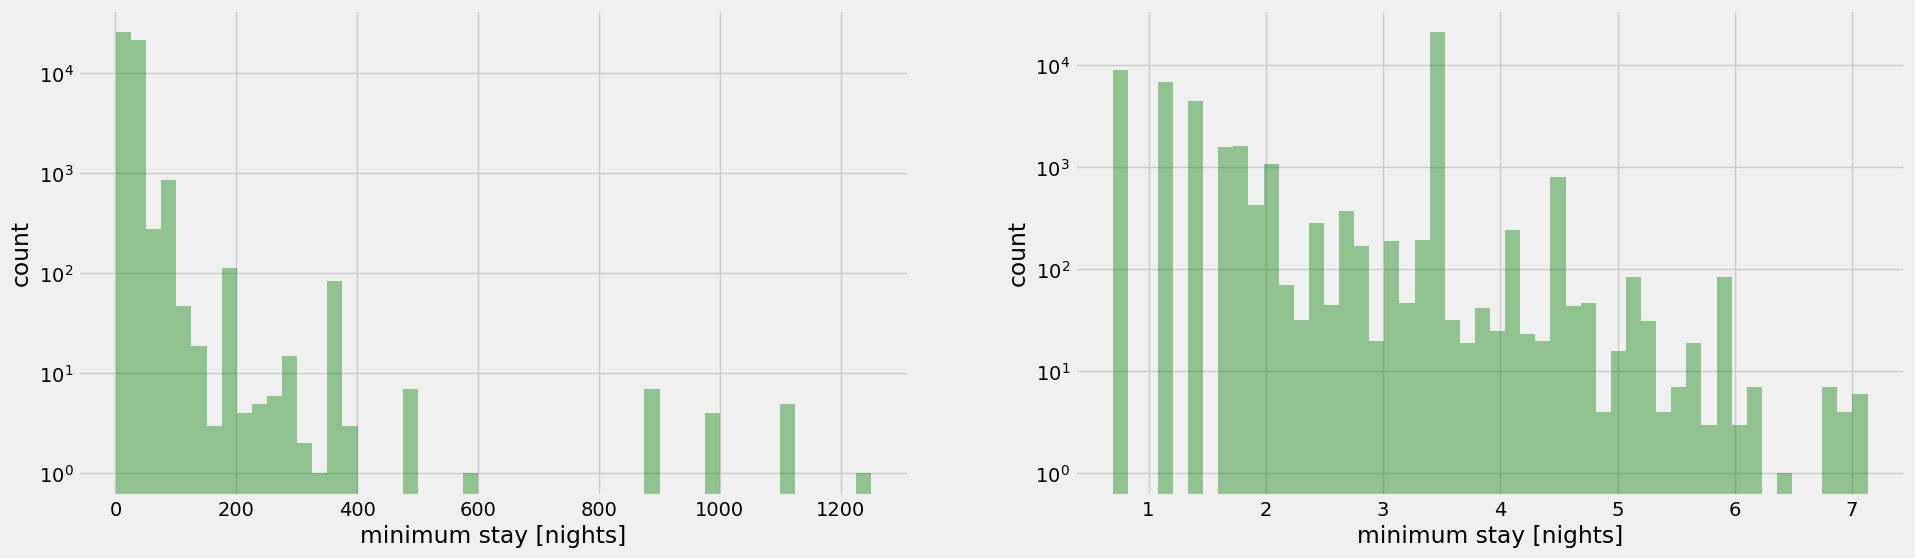

In [52]:
fig, axes = plt.subplots(1,2, figsize=(21, 6))

sns.distplot(final_df['minimum_nights'], rug=False, kde=False, color="green", ax = axes[0])
axes[0].set_yscale('log')
axes[0].set_xlabel('minimum stay [nights]')
axes[0].set_ylabel('count')

sns.distplot(np.log1p(final_df['minimum_nights']), rug=False, kde=False, color="green", ax = axes[1])
axes[1].set_yscale('log')
axes[1].set_xlabel('minimum stay [nights]')
axes[1].set_ylabel('count')

In [53]:
final_df['minimum_nights'] = np.log1p(final_df['minimum_nights'])


<Axes: xlabel='availability_365', ylabel='reviews_per_month'>

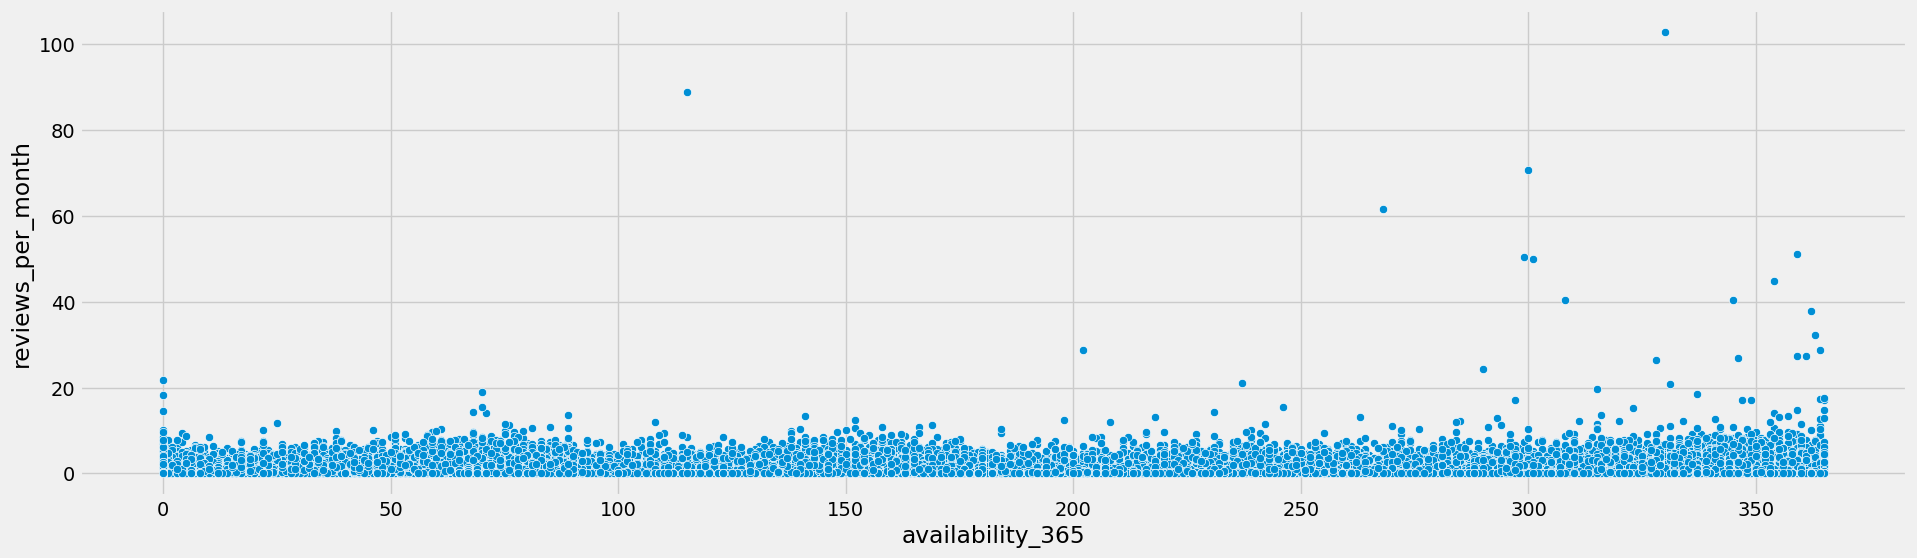

In [54]:
fig, axes = plt.subplots(1,1, figsize=(21,6))
sns.scatterplot(x= final_df['availability_365'], y=final_df['reviews_per_month'])

In [55]:
final_df['reviews_per_month'] = final_df[final_df['reviews_per_month'] < 17.5]['reviews_per_month']

In [56]:
final_df['all_year_avail'] = final_df['availability_365']>353
final_df['low_avail'] = final_df['availability_365']< 12
final_df['no_reviews'] = final_df['reviews_per_month']==0

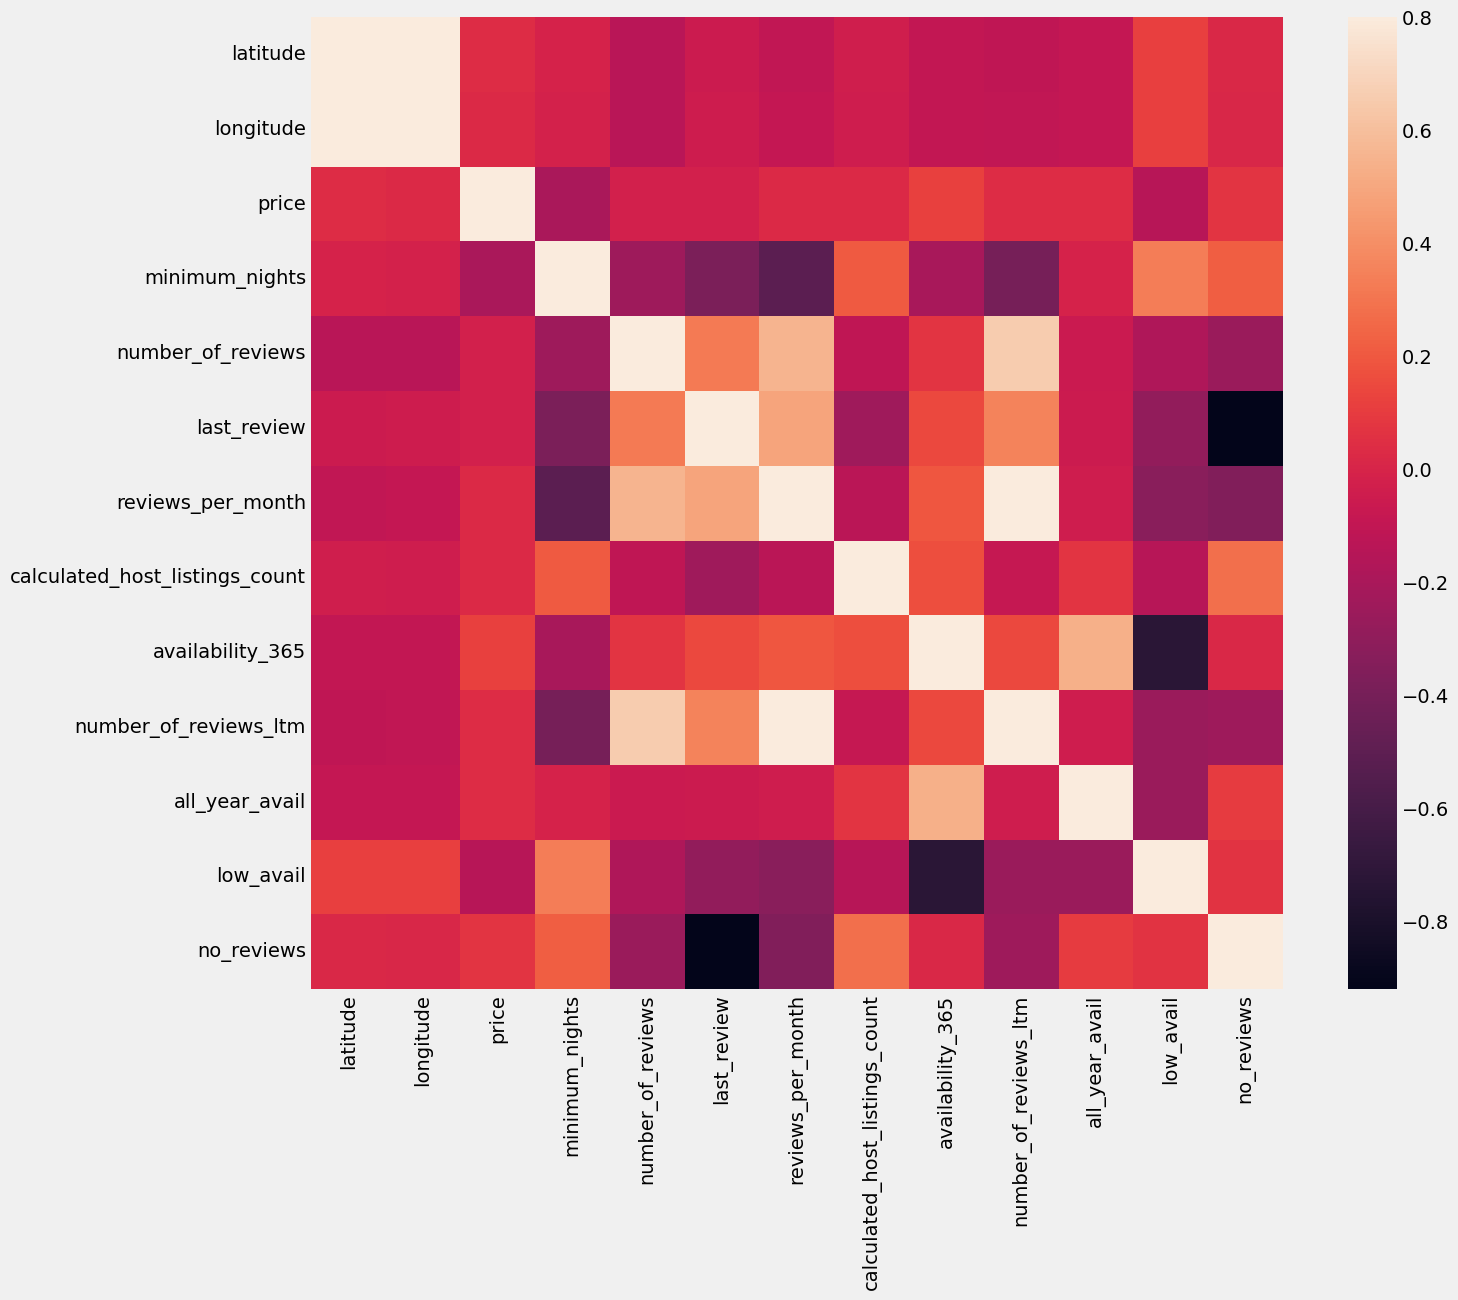

In [57]:
corrmatrix = final_df.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmatrix, vmax=0.8, square=True)
sns.set(font_scale=0.8)

In [58]:
final_df.to_excel("model.xlsx", index=False)


In [59]:
categorical_features = final_df.select_dtypes(include=['object'])
print('Categorical features: {}'.format(categorical_features.shape))

Categorical features: (48970, 4)


In [60]:
categorical_features_one_hot = pd.get_dummies(categorical_features)
categorical_features_one_hot.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_No Neighbourhood group,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,...,"neighbourhood_Woodridge, Fort Lincoln, Gateway",neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,location_New Jersey,location_New york,location_Washington D.C
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [61]:
final_df['reviews_per_month'] = final_df['reviews_per_month'].fillna(0)


In [62]:
numerical_features =  final_df.select_dtypes(exclude=['object'])
y = numerical_features.price
numerical_features = numerical_features.drop(['price'], axis=1)
print('Numerical features: {}'.format(numerical_features.shape))



Numerical features: (48970, 12)


In [63]:
numerical_features.isna().sum()

latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
all_year_avail                    0
low_avail                         0
no_reviews                        0
dtype: int64

In [64]:
X = np.concatenate((numerical_features, categorical_features_one_hot), axis=1)
X_df = pd.concat([numerical_features, categorical_features_one_hot], axis=1)

In [65]:
Processed_data = pd.concat([X_df, y], axis = 1)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
print('Dimensions of the training feature matrix: {}'.format(X_train.shape))
print('Dimensions of the training target vector: {}'.format(y_train.shape))
print('Dimensions of the test feature matrix: {}'.format(X_test.shape))
print('Dimensions of the test target vector: {}'.format(y_test.shape))

Dimensions of the training feature matrix: (39176, 292)
Dimensions of the training target vector: (39176,)
Dimensions of the test feature matrix: (9794, 292)
Dimensions of the test target vector: (9794,)


In [68]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [69]:
n_folds = 5

# squared_loss
def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(numerical_features)
    return cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)

def rmse_lv_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(numerical_features)
    return cross_val_score(model, Xlv_train, y_train, scoring='neg_mean_squared_error', cv=kf)

In [70]:
for Model in [LinearRegression, Ridge, Lasso, ElasticNet, RandomForestRegressor, XGBRegressor, HuberRegressor]:
    if Model == XGBRegressor: cv_res = rmse_cv(XGBRegressor(objective='reg:squarederror'))
    else: cv_res = rmse_cv(Model())
    print('{}: {:.5f} +/- {:5f}'.format(Model.__name__, -cv_res.mean(), cv_res.std()))

LinearRegression: 14715415123257.39453 +/- 19846659292205.863281
Ridge: 0.31677 +/- 0.009215
Lasso: 0.62398 +/- 0.013872
ElasticNet: 0.62398 +/- 0.013872
RandomForestRegressor: 0.23907 +/- 0.009261
XGBRegressor: 0.24344 +/- 0.010247


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/

HuberRegressor: 0.34877 +/- 0.012596


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



In [71]:
alphas1 = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75] 
cv_ridge1 = [-rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas1]

In [72]:
alphas2 = [0.5*i for i in range(4,12)]
cv_ridge2 = [-rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas2]

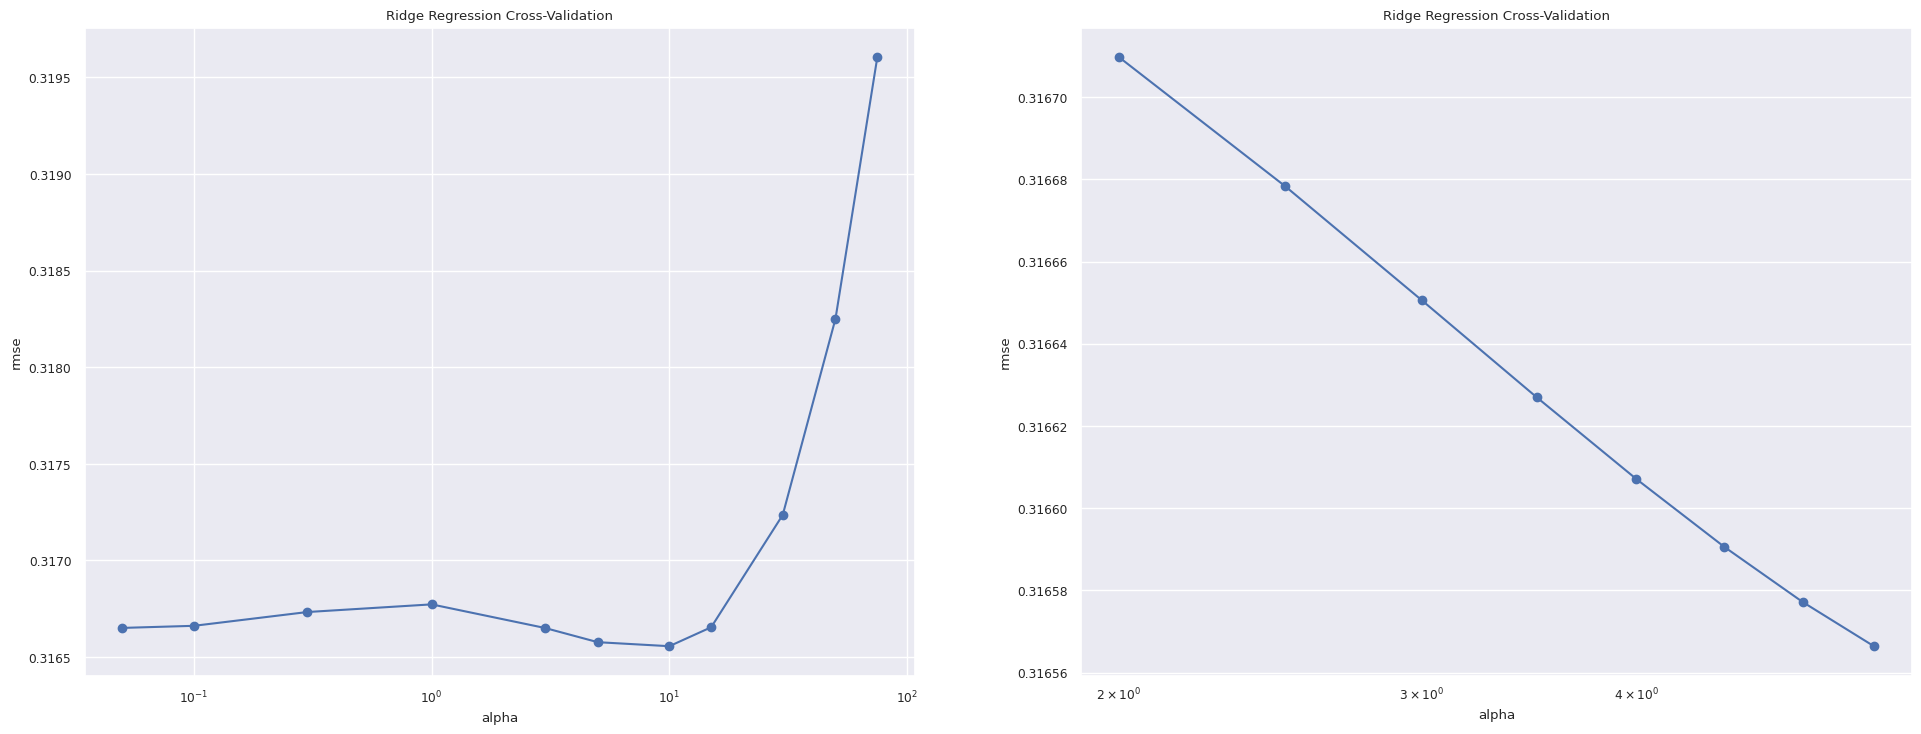

In [73]:
cv_ridge1 = pd.Series(cv_ridge1, index = alphas1) 
cv_ridge2 = pd.Series(cv_ridge2, index = alphas2) 

fig, axes = plt.subplots(1,2,figsize=(21, 8))
cv_ridge1.plot(title = "Ridge Regression Cross-Validation", style='-o', ax = axes[0]) 
axes[0].set_xlabel("alpha") 
axes[0].set_ylabel("rmse")
axes[0].set_xscale('log')

cv_ridge2.plot(title = "Ridge Regression Cross-Validation", style='-o', ax = axes[1]) 
axes[1].set_xlabel("alpha") 
axes[1].set_ylabel("rmse")
axes[1].set_xscale('log')


In [74]:
best_alpha = alphas2[np.argmin(cv_ridge2.values)]
RR_CV_best = -rmse_cv(Ridge(alpha = best_alpha))
RR = Ridge(alpha = best_alpha) 
RR.fit(X_train, y_train) 
y_train_RR = RR.predict(X_train)
y_test_RR = RR.predict(X_test)
ridge_results = pd.DataFrame({'algorithm':['Ridge Regression'],
            'CV error': RR_CV_best.mean(), 
            'CV std': RR_CV_best.std(),
            'training error': [mean_squared_error(y_train, y_train_RR)],
            'test error': [mean_squared_error(y_test_RR, y_test_RR)],
            'training_r2_score': [r2_score(y_train, y_train_RR)],
            'test_r2_score': [r2_score(y_test, y_test_RR)]})
ridge_results

,algorithm,CV error,CV std,training error,test error,training_r2_score,test_r2_score
0,Ridge Regression,0.316566,0.009236,0.312703,0.0,0.498847,0.495733


In [75]:
alphas = [0.0001, 0.001, 0.005,0.01, 0.05, 0.1, 0.3, 1] 
cv_lasso = [-rmse_cv(Lasso(alpha = alpha, max_iter=2000)).mean() for alpha in alphas]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.927e+03, tolerance: 1.954e+00

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.010e+03, tolerance: 1.970e+00

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.850e+03, tolerance: 1.941e+00

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_des

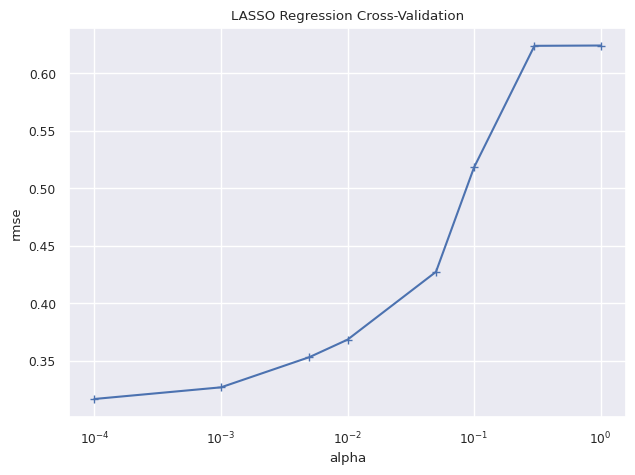

In [76]:
cv_lasso = pd.Series(cv_lasso, index = alphas) 
cv_lasso.plot(title = "LASSO Regression Cross-Validation", style='-+') 
plt.xlabel("alpha") 
plt.ylabel("rmse") 
plt.xscale('log')

In [77]:
best_alpha = alphas[np.argmin(cv_lasso.values)]
lasso_CV_best = -rmse_cv(Lasso(alpha = best_alpha))
lasso = Lasso(alpha = best_alpha) 
lasso.fit(X_train, y_train) 
y_train_lasso = lasso.predict(X_train)
y_test_lasso = lasso.predict(X_test)
lasso_results = pd.DataFrame({'algorithm':['LASSO Regression'],
            'CV error': lasso_CV_best.mean(), 
            'CV std': lasso_CV_best.std(),
            'training error': [mean_squared_error(y_train_lasso, y_train)],
            'test error': [mean_squared_error(y_test_lasso, y_test)],
            'training_r2_score': [r2_score(y_train, y_train_lasso)],
            'test_r2_score': [r2_score(y_test, y_test_lasso)]})
lasso_results

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.249e+03, tolerance: 1.954e+00

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.314e+03, tolerance: 1.970e+00

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.174e+03, tolerance: 1.941e+00

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_des

,algorithm,CV error,CV std,training error,test error,training_r2_score,test_r2_score
0,LASSO Regression,0.317037,0.009384,0.314147,0.312277,0.496533,0.495017


In [78]:
alphas = [0.0001, 0.001, 0.005,0.01, 0.05, 0.1, 0.3, 1] 
#cv_huber = [-rmse_cv(HuberRegressor(alpha = alpha, max_iter=2000)).mean() for alpha in alphas]
cv_huber = [0.20051906841425277, 0.20044833042114646, 0.20048899799050565, 0.200533996471012, 0.20051788009059482, 0.2005294886778608, 0.20052011204607623, 0.2004070661477452]

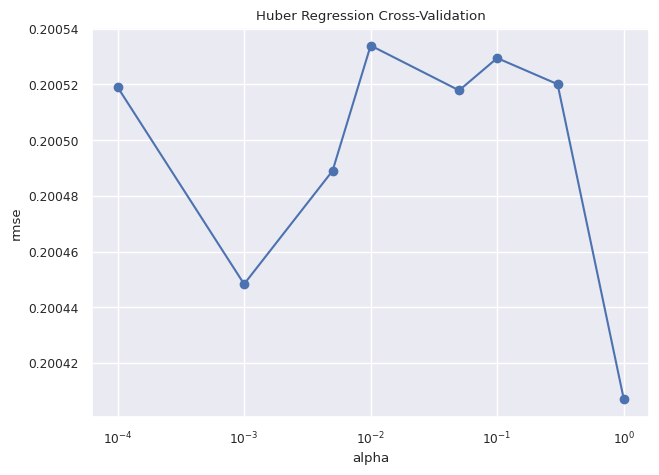

In [79]:
cv_huber = pd.Series(cv_huber, index = alphas) 
cv_huber.plot(title = "Huber Regression Cross-Validation", style='-o') 
plt.xlabel("alpha") 
plt.ylabel("rmse") 
plt.xscale('log')

In [80]:
best_alpha = alphas[np.argmin(cv_huber.values)]
huber_CV_best = -rmse_cv(HuberRegressor(alpha=best_alpha))
huber = HuberRegressor(alpha=best_alpha)
huber.fit(X_train, y_train) 
y_train_huber = huber.predict(X_train)
y_test_huber = huber.predict(X_test)
huber_results = pd.DataFrame({'algorithm':['Huber Regression'],
            'CV error': huber_CV_best.mean(), 
            'CV std': huber_CV_best.std(),
            'training error': [mean_squared_error(y_train, y_train_huber)],
            'test error': [mean_squared_error(y_test, y_test_huber)],
            'training_r2_score': [r2_score(y_train, y_train_huber)],
            'test_r2_score': [r2_score(y_test, y_test_huber)]})
huber_results

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/

,algorithm,CV error,CV std,training error,test error,training_r2_score,test_r2_score
0,Huber Regression,0.345522,0.013352,0.346246,0.343757,0.44509,0.44411


In [81]:
features = list(categorical_features_one_hot.columns) + list(numerical_features.columns)
coef = pd.Series(lasso.coef_, index = features)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 157 variables and eliminated the other 135 variables


In [82]:
lasso_coef = coef[coef!=0]
Xlv = X_df[list(lasso_coef.index)]
#X_lasso_vars.shape
Xlv_train, Xlv_test, y_train, y_test = train_test_split(Xlv, y, test_size=0.2, random_state=42)
print('Dimensions of the training feature matrix for lasso variable selection: {}'.format(Xlv_train.shape))
print('Dimensions of the test feature matrix for lasso variable selection: {}'.format(Xlv_test.shape))

Dimensions of the training feature matrix for lasso variable selection: (39176, 157)
Dimensions of the test feature matrix for lasso variable selection: (9794, 157)


In [83]:
for Model in [LinearRegression, Ridge, Lasso, ElasticNet]:
    if Model == XGBRegressor: cv_res = rmse_cv(XGBRegressor(objective='reg:squarederror'))
    else: cv_res = rmse_lv_cv(Model())
    print('{}: {:.5f} +/- {:5f}'.format(Model.__name__, -cv_res.mean(), cv_res.std()))

LinearRegression: 69352453721.42409 +/- 138704906508.045746
Ridge: 0.34028 +/- 0.010957
Lasso: 0.61387 +/- 0.013572
ElasticNet: 0.61385 +/- 0.013552


In [84]:
alphas1 = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75] 
cv_ridge1 = [-rmse_lv_cv(Ridge(alpha = alpha)).mean() for alpha in alphas1]

In [85]:
alphas2 = [1.4+0.05*i for i in range(1,12)]
cv_ridge2 = [-rmse_lv_cv(Ridge(alpha = alpha)).mean() for alpha in alphas2]

Text(0, 0.5, 'rmse')

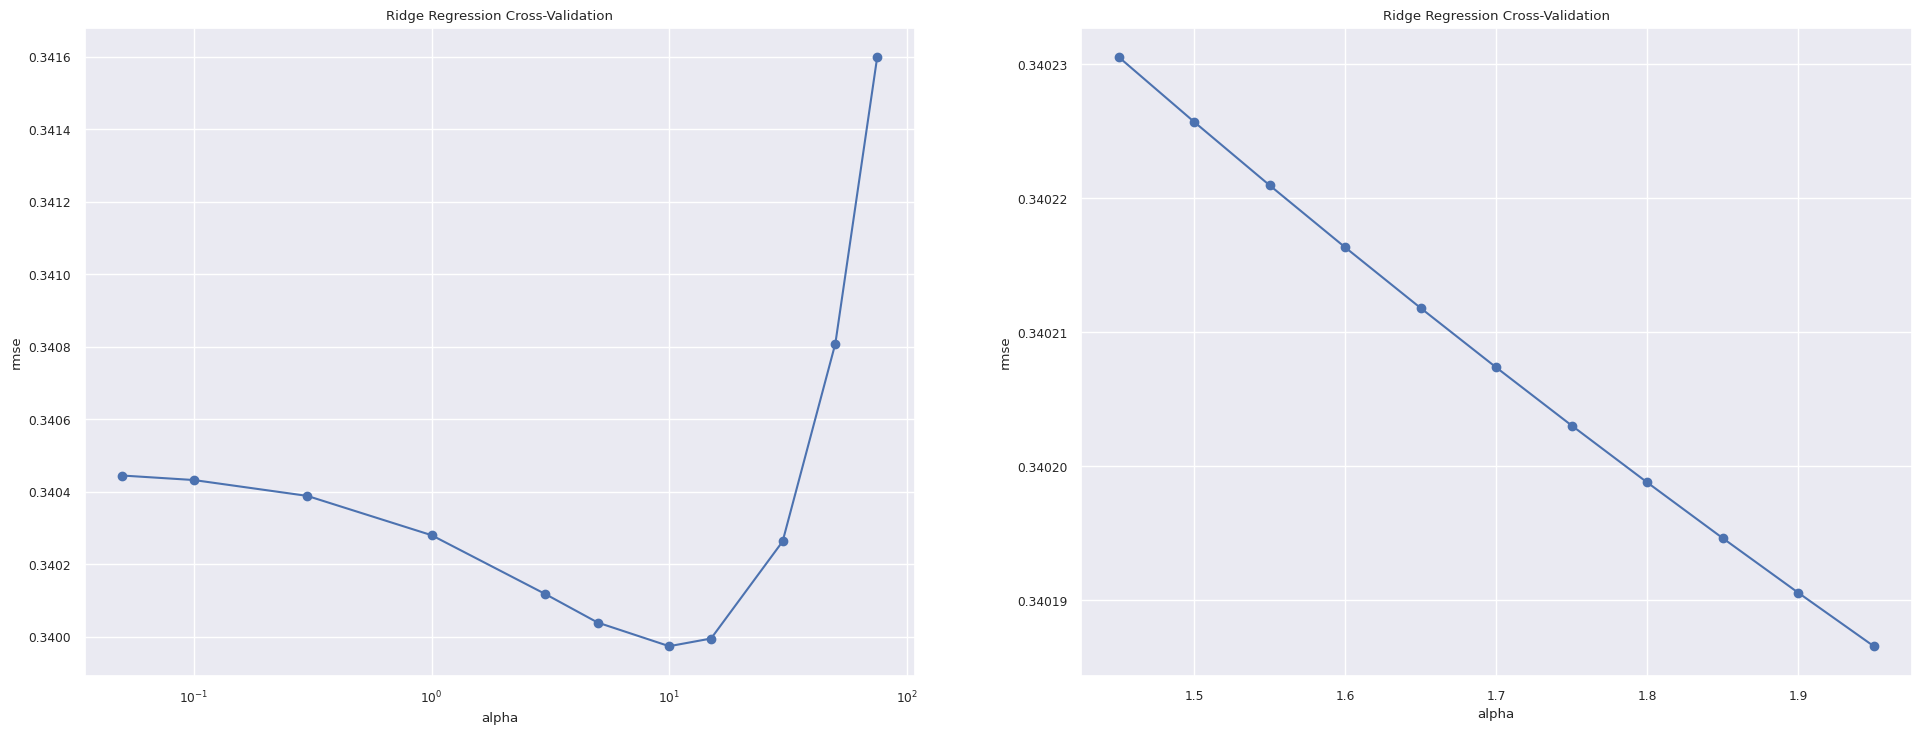

In [86]:
cv_ridge1 = pd.Series(cv_ridge1, index = alphas1) 
cv_ridge2 = pd.Series(cv_ridge2, index = alphas2) 

fig, axes = plt.subplots(1,2,figsize=(21, 8))
cv_ridge1.plot(title = "Ridge Regression Cross-Validation", style='-o', ax = axes[0]) 
axes[0].set_xlabel("alpha") 
axes[0].set_ylabel("rmse")
axes[0].set_xscale('log')

cv_ridge2.plot(title = "Ridge Regression Cross-Validation", style='-o', ax = axes[1]) 
axes[1].set_xlabel("alpha") 
axes[1].set_ylabel("rmse")
#axes[1].set_xscale('log')

#RR_best = Ridge(alpha = np.argmin(cv_ridge)) RR_best.fit(X_train, y_train) predicted_prices = RR_best.predict(test_data)

In [87]:
best_alpha = alphas2[np.argmin(cv_ridge2.values)]
RR_lassoVars_CV_best = -rmse_lv_cv(Ridge(alpha = best_alpha))
RR_lassoVars = Ridge(alpha = best_alpha) 
RR_lassoVars.fit(Xlv_train, y_train) 
y_train_RR_lassoVars = RR_lassoVars.predict(Xlv_train)
y_test_RR_lassoVars = RR_lassoVars.predict(Xlv_test)
ridge_lassoVars_results = pd.DataFrame({'algorithm':['Ridge Regression with LASSO variable selection'],
            'CV error': RR_lassoVars_CV_best.mean(), 
            'CV std': RR_lassoVars_CV_best.std(),
            'training error': [mean_squared_error(y_train, y_train_RR_lassoVars)],
            'test error': [mean_squared_error(y_test, y_test_RR_lassoVars)],
            'training_r2_score': [r2_score(y_train, y_train_RR_lassoVars)],
            'test_r2_score': [r2_score(y_test, y_test_RR_lassoVars)]})

In [88]:
rfr_CV_baseline = -rmse_cv(RandomForestRegressor(random_state=42))
rfr_baseline = RandomForestRegressor(random_state=42)
rfr_baseline.fit(X_train, y_train) 
y_train_rfr = rfr_baseline.predict(X_train)
y_test_rfr = rfr_baseline.predict(X_test)
rfr_baseline_results = pd.DataFrame({'algorithm':['Random Forest Regressor [baseline]'],
            'CV error': rfr_CV_baseline.mean(), 
            'CV std': rfr_CV_baseline.std(),
            'training error': [mean_squared_error(y_train_rfr, y_train)],
            'test error': [mean_squared_error(y_test_rfr, y_test)]})

In [89]:
rfr_baseline_results

,algorithm,CV error,CV std,training error,test error
0,Random Forest Regressor [baseline],0.23932,0.00911,0.032691,0.246418


In [90]:
print(rfr_baseline.estimators_)

[DecisionTreeRegressor(max_features=1.0, random_state=1608637542), DecisionTreeRegressor(max_features=1.0, random_state=1273642419), DecisionTreeRegressor(max_features=1.0, random_state=1935803228), DecisionTreeRegressor(max_features=1.0, random_state=787846414), DecisionTreeRegressor(max_features=1.0, random_state=996406378), DecisionTreeRegressor(max_features=1.0, random_state=1201263687), DecisionTreeRegressor(max_features=1.0, random_state=423734972), DecisionTreeRegressor(max_features=1.0, random_state=415968276), DecisionTreeRegressor(max_features=1.0, random_state=670094950), DecisionTreeRegressor(max_features=1.0, random_state=1914837113), DecisionTreeRegressor(max_features=1.0, random_state=669991378), DecisionTreeRegressor(max_features=1.0, random_state=429389014), DecisionTreeRegressor(max_features=1.0, random_state=249467210), DecisionTreeRegressor(max_features=1.0, random_state=1972458954), DecisionTreeRegressor(max_features=1.0, random_state=1572714583), DecisionTreeRegre

In [91]:
rf = RandomForestRegressor(random_state=42)
from pprint import pprint
print('Parameters currently in use: \n')
pprint(rf.get_params())

Parameters currently in use: 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [92]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop=2000,num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [93]:
xbgreg_best = XGBRegressor(n_estimators=1000, learning_rate=0.1, early_stopping=5, max_depth=5, min_child_weight=1 )
xbgreg_CV_best = -rmse_cv(xbgreg_best)
xbgreg_best.fit(X_train, y_train) 
y_train_xgbreg = xbgreg_best.predict(X_train)
y_test_xgbreg = xbgreg_best.predict(X_test)
xgb_best_results = pd.DataFrame({'algorithm':['XGBRegressor'],
            'CV error': xbgreg_CV_best.mean(), 
            'CV std': xbgreg_CV_best.std(),
            'training error': [mean_squared_error(y_train, y_train_xgbreg)],
            'test error': [mean_squared_error(y_test, y_test_xgbreg)],
            'training_r2_score': [r2_score(y_train, y_train_xgbreg)],
            'test_r2_score': [r2_score(y_test, y_test_xgbreg)]})
xgb_best_results

[20:54:06] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stopping" } are not used.

[20:58:14] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stopping" } are not used.

[21:02:25] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stopping" } are not used.

[21:06:36] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stopping" } are not used.

[21:10:46] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stopping" } are not used.

[21:14:55] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stopping" } are not used.



,algorithm,CV error,CV std,training error,test error,training_r2_score,test_r2_score
0,XGBRegressor,0.239729,0.008977,0.159005,0.24979,0.745171,0.596064


In [94]:
best_random = RandomForestRegressor(bootstrap=True, criterion='friedman_mse', max_depth=30,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, 
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=1400,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)
rfr_CV_best = -rmse_cv(best_random)
best_random.fit(X_train, y_train) 
y_train_rfr = best_random.predict(X_train)
y_test_rfr = best_random.predict(X_test)
rfr_best_results = pd.DataFrame({'algorithm':['Random Forest Regressor'],
            'CV error': rfr_CV_best.mean(), 
            'CV std': rfr_CV_best.std(),
            'training error': [mean_squared_error(y_train, y_train_rfr)],
            'test error': [mean_squared_error(y_test, y_test_rfr)],
            'training_r2_score': [r2_score(y_train, y_train_rfr)],
            'test_r2_score': [r2_score(y_test, y_test_rfr)]})
rfr_best_results

,algorithm,CV error,CV std,training error,test error,training_r2_score,test_r2_score
0,Random Forest Regressor,0.238001,0.009647,0.106146,0.23764,0.829885,0.615712
